In [6]:
using Plots, LaTeXStrings, Distributions, BenchmarkTools
default(fontfamily = "Computer Modern", size=(600,400), titlefont = (16), legendfontsize = 10, 
        guidefont = (16, :darkgreen), tickfont = (12, :black), 
        framestyle = :box, yminorgrid = true, legend = :outertopright, dpi=600)

# Physics 261: Class 11 -- More about Julia
## 14 Feb 2023
<hr style="border-top: 1px solid purple; margin-top: 1px; border: 3px solid red"></hr>
Items for today:<br>

    0. Valentines day :-) <br>
    1. Strings: rand() & randstring() functions (part of base Julia and the Random package)<br>
    2. Arrays <br>

<hr style="margin-bottom: 1px; border: 3px solid red"></hr>  

## 0. Valentines day 

[ Info: Saved animation to /home/pauln/Dropbox/DocumentsF/_Teaching/Physics_261/Phy261_S2024/Templates/2024Templates/Class_11/tmp.gif


Plots.AnimatedGif("/home/pauln/Dropbox/DocumentsF/_Teaching/Physics_261/Phy261_S2024/Templates/2024Templates/Class_11/tmp.gif")
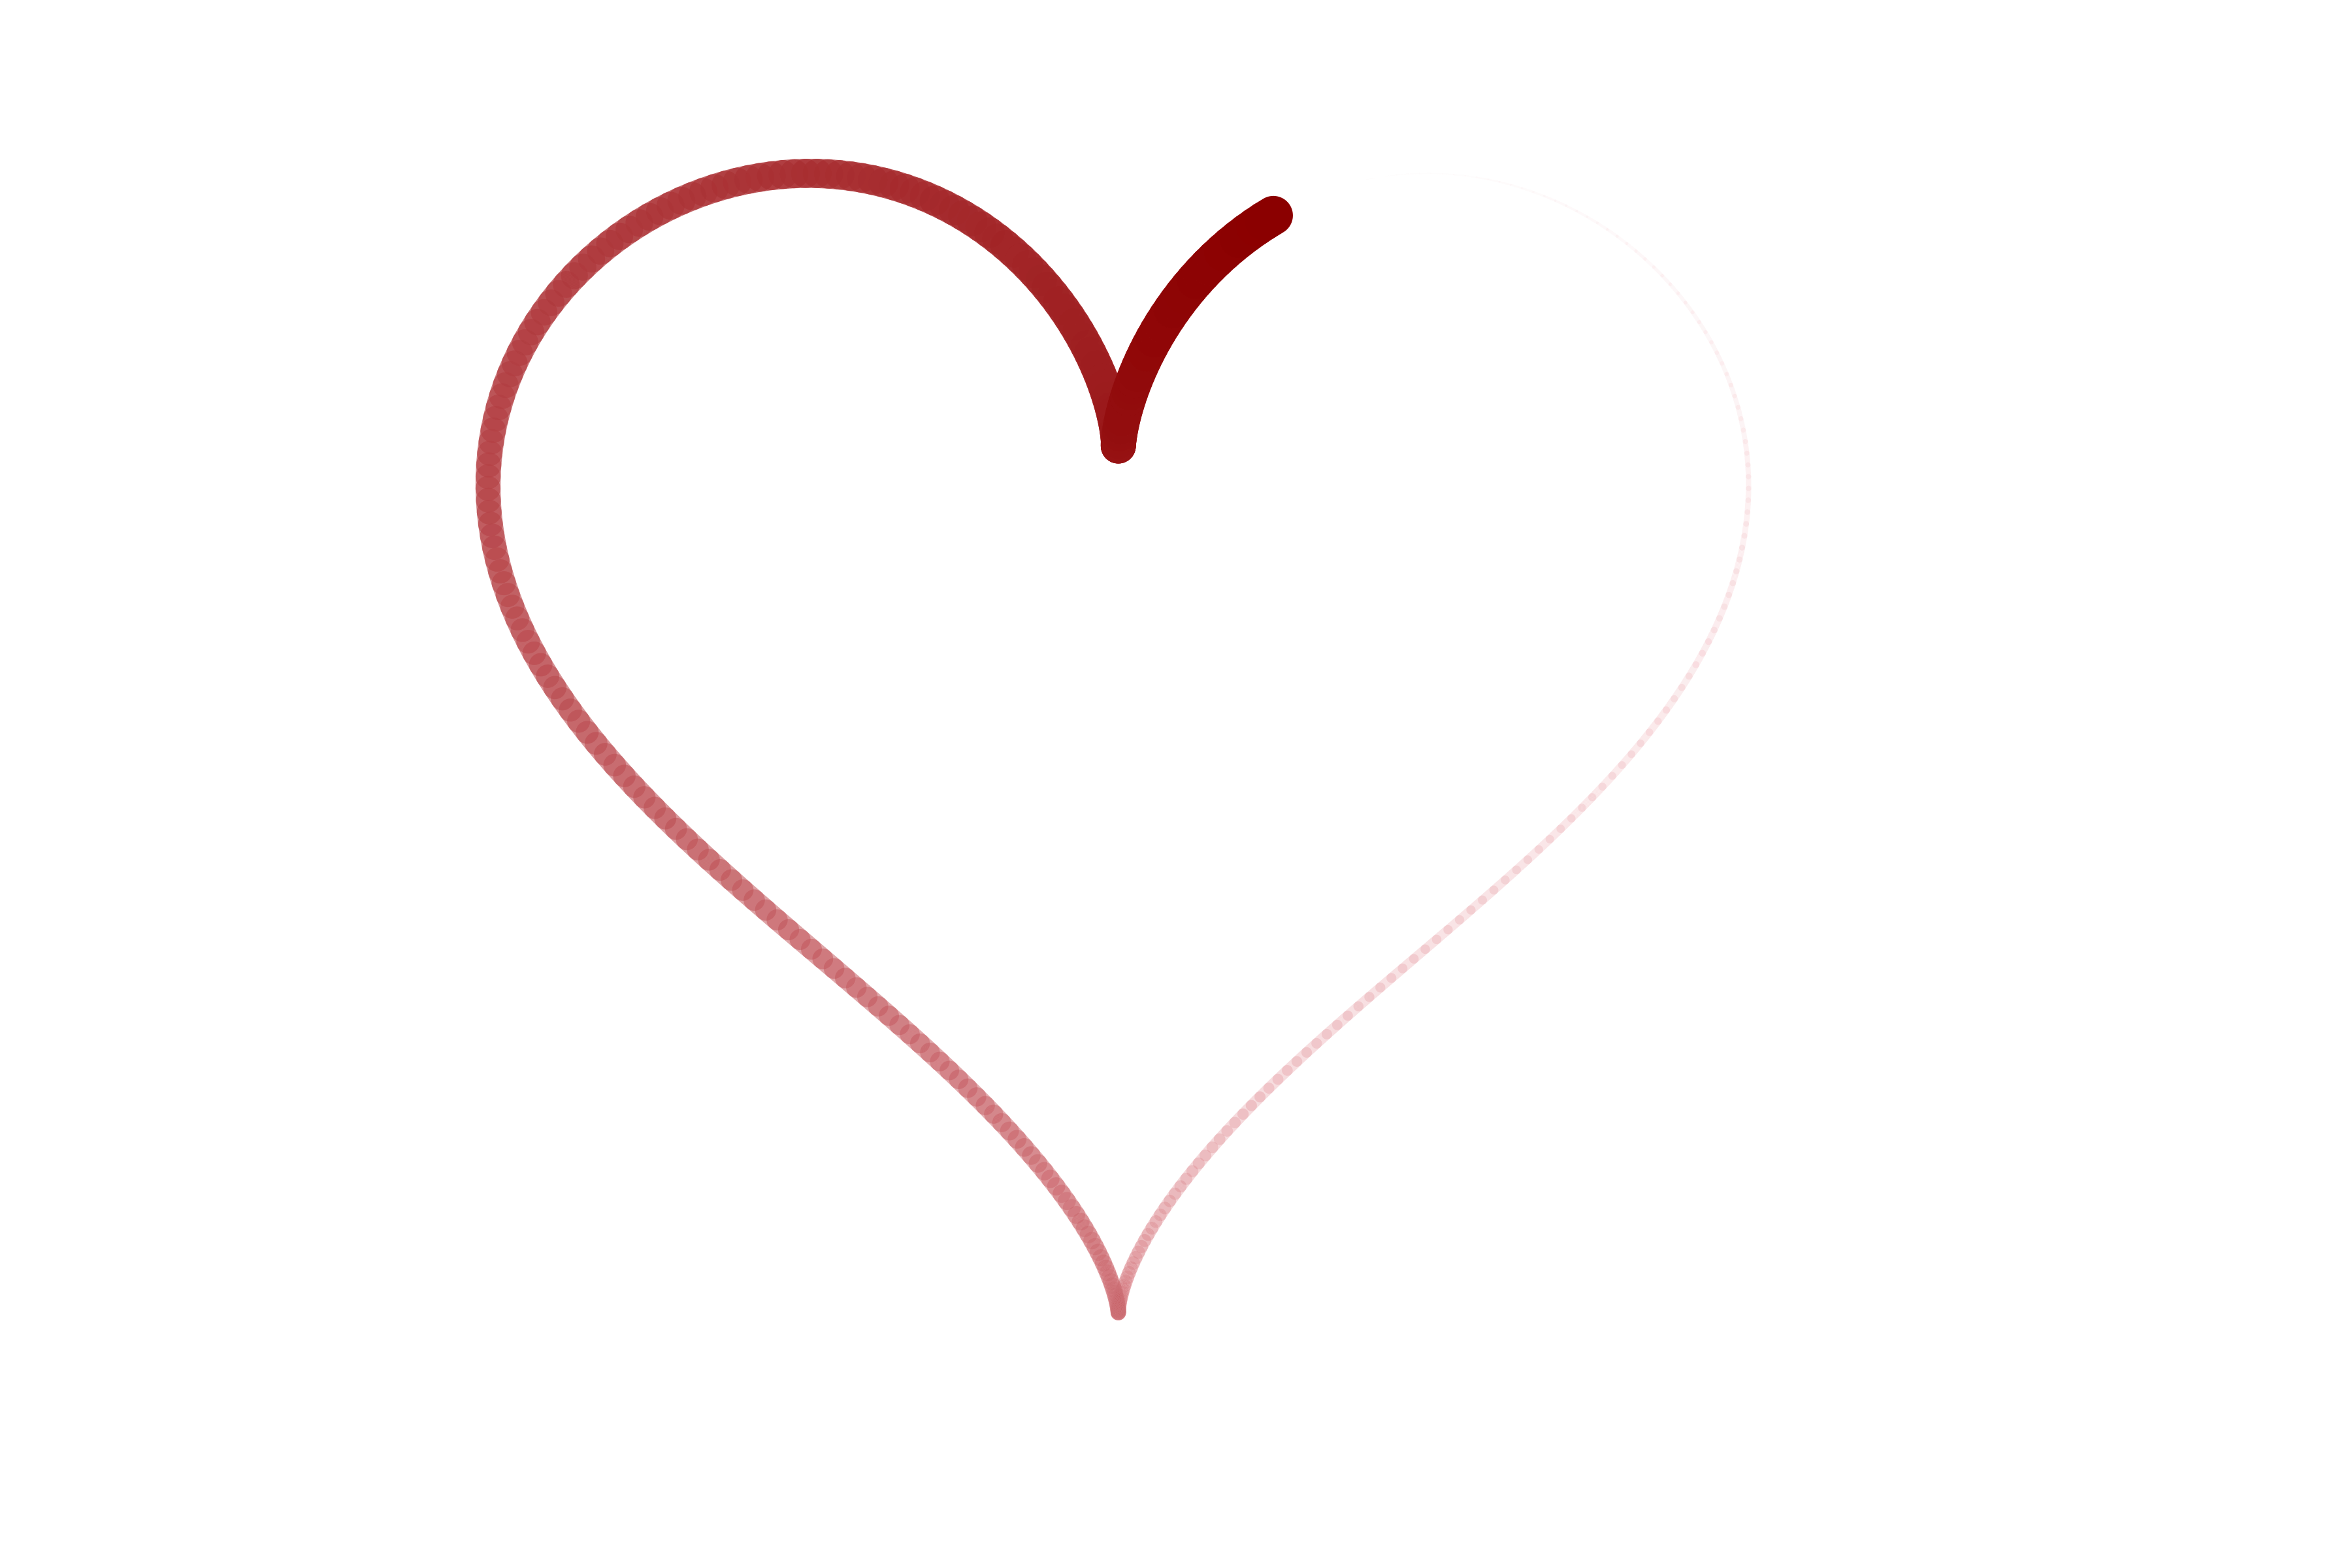

In [7]:
@userplot CirclePlot
@recipe function f(cp::CirclePlot)
    x, y, i = cp.args
    n = length(x)
    inds = circshift(1:n, 1 - i)
    linewidth --> range(0, 10, length = n)
    seriesalpha --> range(0, 1, length = n)
    aspect_ratio --> 1
    label --> false
    x[inds], y[inds]
end
n = 400
t = range(0, 2π, length = n)
x = 16sin.(t).^3
y = 13cos.(t) .- 5cos.(2t) .- 2cos.(3t) .- cos.(4t)

@gif for i ∈ 1:n
    circleplot(x, y, i, line_z = 1:n, cbar = false, c = :reds, framestyle = :none)
end when i > 40 && mod1(i, 10) == 5


## 1. Cycling back: Strings
We've talked about strings in Julia; a *string* is a set of *characters*; you can think of a string as an array or list of characters,
and you address the individual characters by their position number in the string:

You can use an emoji as a variable name; just type
```julia
\:smi<TAB>
```
and you will see a list of emojis (starting with "smi") to choose from.

In [8]:
😺 = "Baxter the Cat"

"Baxter the Cat"

You can add to a string by the * operator:

In [3]:
best_cat = 😺 * " is the best cat"

"Baxter the Cat is the best cat"

In [4]:
# pull out the third character in best_cat:
best_cat[3]

'x': ASCII/Unicode U+0078 (category Ll: Letter, lowercase)

In [5]:
# extract the second through 6th characters:
best_cat[2:6]

"axter"

In [13]:
# extract every other character starting from the first:
best_cat[1:2:end]  


"Bxe h a stebs a"

In [14]:
# last three characters
best_cat[end-3:end]

" cat"

### The rand() and randstring() functions
The rand() function is part of the base Julia distribution; you can see the documentation for this 
[here](https://docs.julialang.org/en/v1/stdlib/Random/#Random-generation-functions). Here are some examples
of its usage:

In [15]:
# vector of random digits of length 4 
rand(0:9, 4)

4-element Vector{Int64}:
 0
 2
 3
 8

#### Create a password string composed created from a random numerical string of length n

In [18]:
function passwordGen(N)
    password=""
    for i in 1:N
        password = password * string(rand(0:9))
    end
    return password
end
passwordGen(18)

"093167638933300189"

In [19]:
# array of random digits of size 2x3
rand(0:9, 2, 3)

2×3 Matrix{Int64}:
 0  0  5
 6  5  8

In [20]:
# array of random floating point numbers of size 5x2
rand(Float64,(5, 2))

5×2 Matrix{Float64}:
 0.834561  0.6856
 0.429994  0.671894
 0.257707  0.293327
 0.802226  0.0471516
 0.995377  0.51955

In [23]:
# random string of length 8
using Random
randstring(8)

"ZnNic4hV"

## Arrays
An array is a general object (of which a vector, is a special subset case). 

Let's see how to create arrays.

### Manually creating an array
Suppose you want to create a 5x3 array in Julia that looks like this:<br>

$$ A =  \left(\begin{array}{ccc}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
10 & 11 & 12 \\
13 & 14 & 15 \\
\end{array}
\right)
$$

The code to create the first row is the following:
```Julia
A = [ 1 2 3 ]

```
Note that the columns are **not** separated by commas, but by spaces. 

In the code cell below, create A as a 1x3 array with the elements as shown,<br> 
and then use the `typeof()` function so see that *A* is a matrix 
(in this case, a matrix of integers):

### Appending a row to the array
To append another row to the array, we use the vcat (vertical catanate) function:

A = vcat(A, [4 5 6]) # adds [4 5 6] as a new row below the last row of A
In the code cell below, use the vcat() function to manually create the entire 5x3 array.

### Extracing rows and elements of a row
Now that you've got the array defined and you see how to use `vcat()`, let's see how to extract elements of the matrix.
If you want to extract the 1st row, you can write<br>
```Julia
row1 = A[1,  : ]             # first row of  matrix A; returns a vector
row1_comp3 = A[1,  : ][3]    # third component of the first row of A
```
In the cell below, try out the code listed here, and use the `typeof()` command to see that row1 is indeed a vector. 
It is important to know that when you extract a row of a matrix, that row is returned as a *vector*.

Now extract the second row A; do so in the cell below, assigning it to a variable named `row2`:

Now extract the *last* row of A, assigning it to a variable named `last_row`. Do so, without using the fact that the last row is row number 5. In other words, your method should work to extract the last row of *any* matrix.

### Creating arrays of random numbers
Let's make a 5 row by 3 column array of random integers
between 0 and 9:

In [29]:
B = rand(0:9, 5, 3)

5×3 Matrix{Int64}:
 2  8  6
 3  3  8
 5  7  5
 0  2  9
 3  2  7

Now, suppose we want to extract the element (4,3); how do we do that?

Print out the first row of B

Print out the first column of B

Print out rows 2 and 3 of B

Print out columns 2 and 3 of B

Print out the first and third rows of A